In [34]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import table
from __future__ import division
import seaborn as sns

In [2]:
cols = ['frame_number', 'gender', 'emotion', 'year', 'movie_name']
df = pd.read_csv('/home/mayank/Desktop/gender-bias-detection/data.csv', sep = ',')

In [3]:
df.head()

,frame_number,gender,emotion,year,movie_name
0,28,woman,happy,2014,dedh_ishqiya
1,62,woman,happy,2014,dedh_ishqiya
2,60,man,angry,2014,dedh_ishqiya
3,60,man,sad,2014,dedh_ishqiya
4,60,man,angry,2014,dedh_ishqiya


In [4]:
df.gender.value_counts()

man      22042
woman    10155
Name: gender, dtype: int64

In [5]:
df.emotion.value_counts()

neutral     8140
sad         7809
happy       6672
angry       5396
fear        2612
surprise    1267
disgust      301
Name: emotion, dtype: int64

In [6]:
df.year.value_counts()

2014    5498
2016    4506
2015    4441
2017    4188
2013    3397
2011    2977
2010    2307
2012    2292
2009    1343
2008    1248
Name: year, dtype: int64

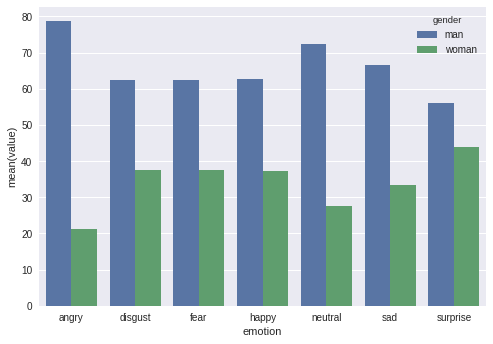

In [7]:
# Emotions vs gender
df1 = pd.crosstab(df.emotion, df.gender).apply(lambda r: r/r.sum() * 100, axis=1)
df1
stacked = df1.stack().reset_index().rename(columns={0:'value'})
sns.barplot(x=stacked.emotion, y=stacked.value, hue=stacked.gender)

In [8]:
# Year vs Gender
df2 = pd.crosstab(df.gender, df.year, margins=True).apply(lambda r: r/r.sum() * 100, axis=1)
df2

year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,All
gender,,,,,,,,,,,
man,1.932674,2.191271,3.629435,4.534525,3.704292,5.278559,8.787769,6.712186,6.721259,6.508030,50.0
woman,1.949778,1.856228,3.481044,4.815362,3.244707,5.268341,7.996061,7.296898,7.597243,6.494338,50.0
All,1.938069,2.085598,3.582632,4.623102,3.559338,5.275336,8.538063,6.896605,6.997546,6.503712,50.0


In [9]:
# Emotions across years & gender
df3 = pd.crosstab([df.year, df.emotion], df.gender, margins=True).apply(lambda r:r/r.sum() * 100, axis=1)
df3

gender               man      woman   All
year emotion                             
2008 angry     40.476190   9.523810  50.0
     disgust   28.571429  21.428571  50.0
     fear      33.766234  16.233766  50.0
     happy     31.702899  18.297101  50.0
     neutral   35.500000  14.500000  50.0
     sad       32.857143  17.142857  50.0
     surprise  25.510204  24.489796  50.0
2009 angry     41.379310   8.620690  50.0
     disgust   31.250000  18.750000  50.0
     fear      35.119048  14.880952  50.0
     happy     33.469388  16.530612  50.0
     neutral   37.435233  12.564767  50.0
     sad       33.870968  16.129032  50.0
     surprise  27.659574  22.340426  50.0
2010 angry     38.903061  11.096939  50.0
     disgust   42.000000   8.000000  50.0
     fear      33.413462  16.586538  50.0
     happy     31.742739  18.257261  50.0
     neutral   36.448598  13.551402  50.0
     sad       33.305228  16.694772  50.0
     surprise  30.555556  19.444444  50.0
2011 angry     39.688249  10.311751  50.0
     disgust   27.272727  22.727273  50.0
     fear      31.504065  18.495935  50.0
     happy     30.577849  19.422151  50.0
     neutral   34.973046  15.026954  50.0
     sad       33.497537  16.502463  50.0
     surprise  24.519231  25.480769  50.0
2012 angry     41.750000   8.250000  50.0
     disgust   25.000000  25.000000  50.0
...                  ...        ...   ...
2013 surprise  28.776978  21.223022  50.0
2014 angry     39.086860  10.913140  50.0
     disgust   35.087719  14.912281  50.0
     fear      31.720430  18.279570  50.0
     happy     34.187726  15.812274  50.0
     neutral   36.676322  13.323678  50.0
     sad       33.951175  16.048825  50.0
     surprise  30.582524  19.417476  50.0
2015 angry     37.608426  12.391574  50.0
     disgust   36.764706  13.235294  50.0
     fear      30.347594  19.652406  50.0
     happy     29.943503  20.056497  50.0
     neutral   36.108677  13.891323  50.0
     sad       32.475248  17.524752  50.0
     surprise  23.684211  26.315789  50.0
2016 angry     39.228723  10.771277  50.0
     disgust   24.444444  25.555556  50.0
     fear      28.900256  21.099744  50.0
     happy     28.518519  21.481481  50.0
     neutral   35.403727  14.596273  50.0
     sad       32.118928  17.881072  50.0
     surprise  26.203209  23.796791  50.0
2017 angry     38.477089  11.522911  50.0
     disgust   29.687500  20.312500  50.0
     fear      30.228758  19.771242  50.0
     happy     29.084507  20.915493  50.0
     neutral   36.966192  13.033808  50.0
     sad       33.393829  16.606171  50.0
     surprise  33.139535  16.860465  50.0
All            34.229897  15.770103  50.0

[71 rows x 3 columns]

In [10]:
movie_list = df['movie_name']

In [11]:
from collections import Counter

In [32]:
x = Counter(movie_list)
x

Counter({'102_not_out': 88,
         '1920': 3,
         '1920_london': 14,
         '2_states': 95,
         '31st_october': 15,
         '332_mumbai_to_india': 15,
         '3_a': 25,
         '3_idiots': 80,
         '3g': 19,
         '404': 22,
         '7_hours_to_go': 16,
         '7_khoon_maaf': 11,
         '8_x_10_tasveer': 22,
         '99': 79,
         '?_:_a_question_mark': 7,
         'a_death_in_the_gunj': 17,
         'a_decent_arrangement': 34,
         'a_flat': 13,
         'a_flying_jatt': 10,
         'a_gentleman': 47,
         'a_wednesday!': 36,
         'aa_dekhen_zara': 11,
         'aa_gaya_hero': 17,
         'aagey_se_right': 69,
         'aakrosh': 10,
         'aashayein': 27,
         'aashiqui_2': 41,
         'aazaan': 15,
         'abcd_2': 10,
         'abhinay_chakra': 28,
         'accident_on_hill_road': 13,
         'acid_factory': 11,
         'action_jackson': 29,
         'action_replayy': 37,
         'ada': 6,
         'agent_vinod': 42,
  

In [14]:
x['102_not_out']

88

In [23]:
d = Counter(movie_list)
d_0 = dict((k, v) for k, v in d.items() if v <= 10)
d_10 = dict((k,v) for k,v in d.items() if v <= 20 and v > 10)
d_20 = dict((k, v) for k, v in d.items() if v <= 30 and v > 20)
d_30 = dict((k, v) for k, v in d.items() if v <= 40 and v > 30)
d_40 = dict((k, v) for k, v in d.items() if v <= 50 and v > 40)
d_50 = dict((k, v) for k, v in d.items() if v <= 60 and v > 50)
d_60 = dict((k, v) for k, v in d.items() if v <= 70 and v > 60)
d_70 = dict((k, v) for k, v in d.items() if v <= 80 and v > 70)
d_80 = dict((k, v) for k, v in d.items() if v <= 90 and v > 80)
d_90 = dict((k, v) for k, v in d.items() if v <= 100 and v > 90)
d_100 = dict((k, v) for k, v in d.items() if v > 100)

In [24]:
d0 = len(d_0)
d10 = len(d_10)
d20 = len(d_20)
d30 = len(d_30)
d40 = len(d_40)
d50 = len(d_50)
d60 = len(d_60)
d70 = len(d_70)
d80 = len(d_80)
d90 = len(d_90)
d100 = len(d_100)

In [25]:
l = [d0, d10, d20, d30, d40, d50, d60, d70, d80, d90, d100]
l

[86, 152, 151, 160, 109, 70, 39, 31, 17, 13, 20]

In [26]:
sum(l)

848

(array([  70.,  156.,  145.,  164.,  116.,   73.,   39.,   31.,   21.,
          10.,   11.,    3.,    2.,    2.,    0.,    3.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
        130, 140, 150, 160]),
 <a list of 16 Patch objects>)

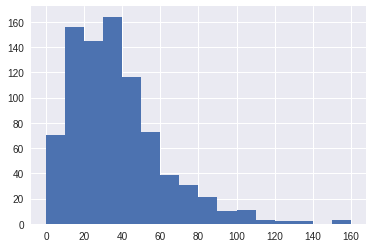

In [55]:
binwidth=10
data = d.values()
plt.hist(data, bins=range(0,160 + binwidth, binwidth))
#bins=range(0, 150 + binwidth, binwidth)


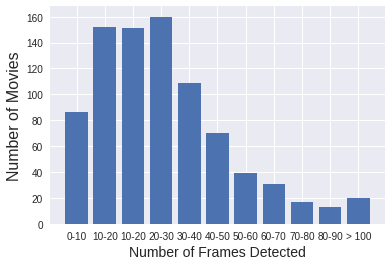

In [67]:
labels = ['0-10','10-20','10-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90', '> 100']

plt.bar(range(len(l)), l, align='center')
plt.xticks(range(len(l)), labels, size='medium')

plt.xlabel('Number of Frames Detected', fontsize=14)
plt.ylabel('Number of Movies', fontsize=16)